# 🧪 Workshop: การวิเคราะห์ข้อความเชิงบริบทด้วย Text Embedding
### Contextual Text Analysis using Sentence Embedding
ผู้สอน: Assist. Prof. Dr. CJ  
วัตถุประสงค์: เรียนรู้การสร้างและวิเคราะห์ Text Embedding ภาษาไทยด้วย SentenceTransformer

In [1]:
!pip install -q sentence-transformers matplotlib scikit-learn

## ส่วนที่ 1: โหลดโมเดลและเตรียมข้อมูลตัวอย่าง

In [2]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# โหลดโมเดล multilingual ที่รองรับภาษาไทย
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# ข้อความตัวอย่างภาษาไทย
texts = [
    "รถยนต์ไฟฟ้าเป็นมิตรต่อสิ่งแวดล้อม",
    "ยานยนต์พลังงานสะอาดกำลังได้รับความนิยม",
    "ธนาคารให้บริการสินเชื่อบ้าน",
    "แม่น้ำมีน้ำมากในฤดูฝน",
    "รถยนต์ใช้น้ำมันเชื้อเพลิง"
]

print("จำนวนข้อความที่ใช้ในการทดลอง:", len(texts))

จำนวนข้อความที่ใช้ในการทดลอง: 5


## ส่วนที่ 2: การสร้าง Text Embeddings

In [3]:
embeddings = model.encode(texts)
print("Embedding Shape:", embeddings.shape)
print("\nตัวอย่างเวกเตอร์ของข้อความแรก:")
print(embeddings[0][:10])

Embedding Shape: (5, 384)

ตัวอย่างเวกเตอร์ของข้อความแรก:
[ 0.25400084  0.40178457 -0.08627782  0.09752196  0.40914038  0.31485608
  0.08946256 -0.00659973 -0.27333844 -0.147912  ]


## ส่วนที่ 3: การวัดความคล้ายคลึงของข้อความ

In [4]:
similarity = util.cos_sim(embeddings, embeddings)
print("\nตารางความคล้ายคลึง (Cosine Similarity Matrix):\n")
print(similarity)

print("\n=== การวิเคราะห์ความคล้ายคลึงเชิงความหมาย ===\n")
for i in range(len(texts)):
    for j in range(i+1, len(texts)):
        print(f"[{texts[i]}] ↔ [{texts[j]}] = {similarity[i][j]:.3f}")


ตารางความคล้ายคลึง (Cosine Similarity Matrix):

tensor([[1.0000, 0.7837, 0.0853, 0.1051, 0.5197],
        [0.7837, 1.0000, 0.0282, 0.0930, 0.5883],
        [0.0853, 0.0282, 1.0000, 0.1278, 0.0263],
        [0.1051, 0.0930, 0.1278, 1.0000, 0.1450],
        [0.5197, 0.5883, 0.0263, 0.1450, 1.0000]])

=== การวิเคราะห์ความคล้ายคลึงเชิงความหมาย ===

[รถยนต์ไฟฟ้าเป็นมิตรต่อสิ่งแวดล้อม] ↔ [ยานยนต์พลังงานสะอาดกำลังได้รับความนิยม] = 0.784
[รถยนต์ไฟฟ้าเป็นมิตรต่อสิ่งแวดล้อม] ↔ [ธนาคารให้บริการสินเชื่อบ้าน] = 0.085
[รถยนต์ไฟฟ้าเป็นมิตรต่อสิ่งแวดล้อม] ↔ [แม่น้ำมีน้ำมากในฤดูฝน] = 0.105
[รถยนต์ไฟฟ้าเป็นมิตรต่อสิ่งแวดล้อม] ↔ [รถยนต์ใช้น้ำมันเชื้อเพลิง] = 0.520
[ยานยนต์พลังงานสะอาดกำลังได้รับความนิยม] ↔ [ธนาคารให้บริการสินเชื่อบ้าน] = 0.028
[ยานยนต์พลังงานสะอาดกำลังได้รับความนิยม] ↔ [แม่น้ำมีน้ำมากในฤดูฝน] = 0.093
[ยานยนต์พลังงานสะอาดกำลังได้รับความนิยม] ↔ [รถยนต์ใช้น้ำมันเชื้อเพลิง] = 0.588
[ธนาคารให้บริการสินเชื่อบ้าน] ↔ [แม่น้ำมีน้ำมากในฤดูฝน] = 0.128
[ธนาคารให้บริการสินเชื่อบ้าน] ↔ [รถยนต์ใช้น้ำม

## ส่วนที่ 4: การแสดงภาพเชิงเวกเตอร์ด้วย t-SNE

In [5]:
# Install a font that supports Thai characters
!sudo apt-get install fonts-thai-tlwg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-thai-tlwg is already the newest version (1:0.7.3-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [6]:
# Find the installation path of the fonts-thai-tlwg package
!dpkg -L fonts-thai-tlwg

/.
/usr
/usr/share
/usr/share/doc
/usr/share/doc/fonts-thai-tlwg
/usr/share/doc/fonts-thai-tlwg/NEWS.gz
/usr/share/doc/fonts-thai-tlwg/README
/usr/share/doc/fonts-thai-tlwg/copyright
/usr/share/doc/fonts-thai-tlwg/changelog.Debian.gz


In [7]:
import matplotlib.font_manager as fm

# List all available fonts
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
thai_fonts = [font for font in font_list if 'thai' in font.lower()]
print("Available Thai fonts:")
for font in thai_fonts:
    print(font)

Available Thai fonts:


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Configure matplotlib to use the installed font by specifying the path
# Search for font files in /usr/share/fonts/
font_paths = fm.findSystemFonts(fontpaths=['/usr/share/fonts/'], fontext='ttf')
thai_font_path = None
for font_path in font_paths:
    if 'thsarabunnew.ttf' in font_path.lower():
        thai_font_path = font_path
        break

# If TH Sarabun New is not found, try to find another Thai font
if not thai_font_path:
    for font_path in font_paths:
        if 'tlwg' in font_path.lower(): # Look for fonts from the tlwg package
             thai_font_path = font_path
             break

if thai_font_path:
    print(f"Found Thai font: {thai_font_path}")
    fm.fontManager.addfont(thai_font_path)
    # Get the font name from the font file
    font_name = fm.FontProperties(fname=thai_font_path).get_name()
    print(f"Using font: {font_name}")
    plt.rcParams['font.family'] = font_name
    plt.rcParams['font.size'] = 12
else:
    print("No suitable Thai font found.")

Found Thai font: /usr/share/fonts/truetype/tlwg/TlwgTypo-Oblique.ttf
Using font: Tlwg Typo


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Tlwg Typo.
  fig.canvas.print_figure(bytes_io, **kw)


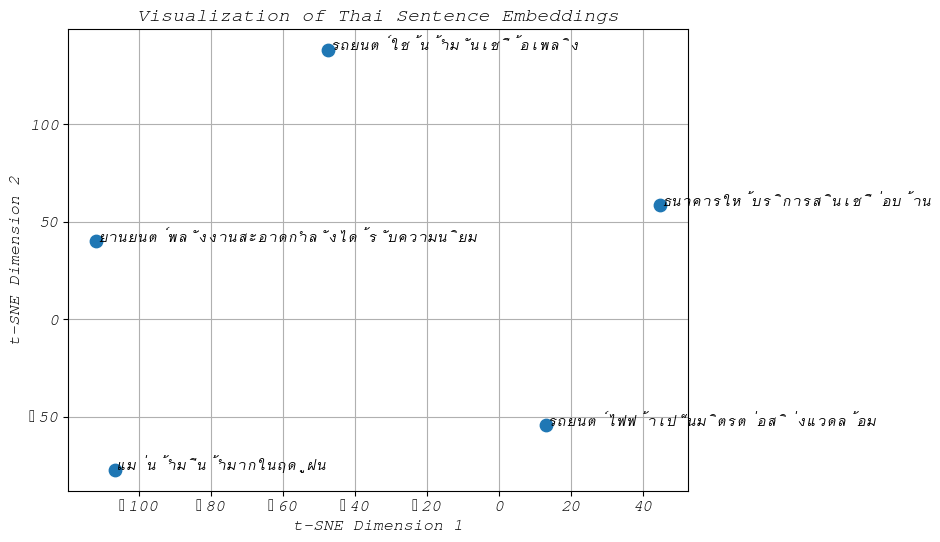

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=4)
reduced = tsne.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], s=80)
for i, text in enumerate(texts):
    # Use the font family name set in rcParams
    plt.annotate(text, (reduced[i,0]+0.2, reduced[i,1]), fontsize=12)
plt.title("Visualization of Thai Sentence Embeddings", fontsize=14)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

## ส่วนที่ 5: สรุปและอภิปรายผล


🧠 สรุปเชิงแนวคิด:
- ข้อความที่มีความหมายใกล้เคียงกัน เช่น 'รถยนต์ไฟฟ้า' กับ 'ยานยนต์พลังงานสะอาด' จะอยู่ใกล้กันในพื้นที่เวกเตอร์
- ข้อความที่บริบทต่างกัน เช่น 'รถยนต์ไฟฟ้า' กับ 'ธนาคาร' จะมีระยะห่างมาก
- แสดงให้เห็นว่า embedding ช่วยให้ระบบเข้าใจ 'ความหมาย' มากกว่า 'คำ'